In [3]:
# Import required packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from dython.nominal import associations

# Load data file


In [4]:
data = pd.read_csv('data.txt').drop_duplicates()

In [5]:
# Checking if data has been read correctly
print(data.head())
print(data.tail())

      ID Marital Status  Gender Income  Children            Education  \
0  22400        Married    Male  10000         0      Partial College   
1  16438        Married  Female  10000         0  Partial High School   
2  16200         Single  Female  10000         0  Partial High School   
3  16514         Single    Male  10000         0      Partial College   
4  24140         Single    Male  10000         0      Graduate Degree   

  Occupation Home Owner Cars Commute Distance   Region Age Purchased Bike  \
0     Manual         No    1        0-1 Miles  Pacific  26            Yes   
1     Manual         No    2        0-1 Miles   Europe  30             No   
2     Manual         No    2        0-1 Miles   Europe  35             No   
3     Manual        Yes    1        1-2 Miles  Pacific  26            Yes   
4     Manual         No    0        0-1 Miles   Europe  30            Yes   

  Unnamed: 13  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN  
  

In [6]:
data.columns

Index(['ID', 'Marital Status', 'Gender', 'Income', 'Children', 'Education',
       'Occupation', 'Home Owner', 'Cars', 'Commute Distance', 'Region', 'Age',
       'Purchased Bike', 'Unnamed: 13'],
      dtype='object')

In [7]:
# Drop unnamed column
column_name = 'Unnamed: 13'
if column_name in data.columns:
    data.drop('Unnamed: 13', inplace=True, axis=1)
data

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,22400,Married,Male,10000,0,Partial College,Manual,No,1,0-1 Miles,Pacific,26,Yes
1,16438,Married,Female,10000,0,Partial High School,Manual,No,2,0-1 Miles,Europe,30,No
2,16200,Single,Female,10000,0,Partial High School,Manual,No,2,0-1 Miles,Europe,35,No
3,16514,Single,Male,10000,0,Partial College,Manual,Yes,1,1-2 Miles,Pacific,26,Yes
4,24140,Single,Male,10000,0,Graduate Degree,Manual,No,0,0-1 Miles,Europe,30,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,13133,Single,Male,100000,5,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,47,Yes
996,18494,Married,Male,110000,5,Bachelors,Management,Yes,4,2-5 Miles,Pacific,48,Yes
997,15982,Married,Male,110000,5,Partial College,Professional,Yes,4,2-5 Miles,North America,46,No
998,12664,Married,Female,130000,5,Partial College,Professional,Yes,4,0-1 Miles,Europe,59,No


In [8]:
data.dtypes

ID                   int64
Marital Status      object
Gender              object
Income              object
Children             int64
Education           object
Occupation          object
Home Owner          object
Cars                object
Commute Distance    object
Region              object
Age                 object
Purchased Bike      object
dtype: object

In [9]:
for column in data:
    # print unique values in each column
    print(column, data[column].unique())

ID [22400 16438 16200 16514 24140 23993 22402 15465 23963 17907 12212 17843
 22399 25313 25555 14696 19508 29424 19183 22538 12581 23962 15629 16466
 20942 26863 26956 16188 28412 15030 17845 12253 25559 28729 13673 24174
 22527 25665 26879 20851 17926 20994 11489 27165 27878 25512 13690 28488
 13662 27835 25597 17841 27832 13826 25303 26941 24119 26886 28436 15608
 22707 12871 12716 12728 20946 20060 12284 14154 16468 19174 13683 17848
 24121 22439 27169 19389 12718 12731 12389 15612 15665 22610 25681 11935
 14092 25006 17369 23549 22983 13066 18910 16725 14090 22014 14514 14077
 22971 14271 18347 15839 18322 14872 12029 18329 14332 25598 14939 12808
 29355 19441 26829 28395 27775 19477 22500 22464 19475 22633 14777 17964
 16406 27760 26354 22636 17978 17793 17960 14791 22634 28521 12821 26575
 15275 19399 11143 18752 23089 25261 15814 27753 15272 22010 29106 22976
 21260 29132 16020 27731 19634 28087 13151 24496 18363 28090 15255 13154
 26778 23333 24514 27505 20421 18891 17482 29052

### check heatmap to see Unique/outlier variables

<AxesSubplot:>

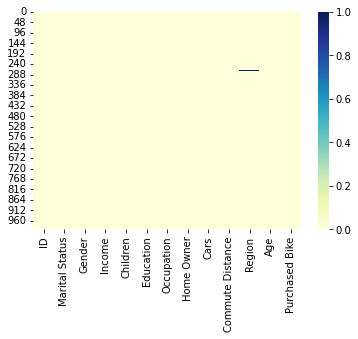

In [10]:
sns.heatmap(data.isna(), cmap="YlGnBu")

In [11]:
data[data.isna().any(axis=1)]

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
8,23963,NaN,Married,Male,10000,0,Partial High School,Manual,No,2,0-1 Miles,Europe,33
246,21554,Single,Female,80000,0,NaN,Professional,No,3,10+ Miles,Pacific,33,No
271,13082,Single,Male,130000,0,Graduate Degree,Management,Yes,0,2-5 Miles,NaN,48,Yes
328,14883,Married,NaN,30000,1,Bachelors,Skilled Manual,Yes,1,5-10 Miles,North America,53,Yes


In [12]:
# Since there are very few rows with nans 4/1000, remove them
data = data.dropna()
data[data.isna().any(axis=1)]

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike


In [13]:
for column in data:
    print(column, data[column].unique())

ID [22400 16438 16200 16514 24140 23993 22402 15465 17907 12212 17843 22399
 25313 25555 14696 19508 29424 19183 22538 12581 23962 15629 16466 20942
 26863 26956 16188 28412 15030 17845 12253 25559 28729 13673 24174 22527
 25665 26879 20851 17926 20994 11489 27165 27878 25512 13690 28488 13662
 27835 25597 17841 27832 13826 25303 26941 24119 26886 28436 15608 22707
 12871 12716 12728 20946 20060 12284 14154 16468 19174 13683 17848 24121
 22439 27169 19389 12718 12731 12389 15612 15665 22610 25681 11935 14092
 25006 17369 23549 22983 13066 18910 16725 14090 22014 14514 14077 22971
 14271 18347 15839 18322 14872 12029 18329 14332 25598 14939 12808 29355
 19441 26829 28395 27775 19477 22500 22464 19475 22633 14777 17964 16406
 27760 26354 22636 17978 17793 17960 14791 22634 28521 12821 26575 15275
 19399 11143 18752 23089 25261 15814 27753 15272 22010 29106 22976 21260
 29132 16020 27731 19634 28087 13151 24496 18363 28090 15255 13154 26778
 23333 24514 27505 20421 18891 17482 29052 19147

In [14]:
data[data.Cars == '-1']

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
73,22439,Married,Female,30000,0,Bachelors,Clerical,Yes,-1,0-1 Miles,Europe,37,Yes


In [15]:
data[data.isna().any(axis=1)]

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike


In [16]:
data.at[73, 'Cars'] = None
data = data.dropna()
data[data.isna().any(axis=1)]



,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike


In [17]:
for column in data:
    print(column, data[column].unique())

ID [22400 16438 16200 16514 24140 23993 22402 15465 17907 12212 17843 22399
 25313 25555 14696 19508 29424 19183 22538 12581 23962 15629 16466 20942
 26863 26956 16188 28412 15030 17845 12253 25559 28729 13673 24174 22527
 25665 26879 20851 17926 20994 11489 27165 27878 25512 13690 28488 13662
 27835 25597 17841 27832 13826 25303 26941 24119 26886 28436 15608 22707
 12871 12716 12728 20946 20060 12284 14154 16468 19174 13683 17848 24121
 27169 19389 12718 12731 12389 15612 15665 22610 25681 11935 14092 25006
 17369 23549 22983 13066 18910 16725 14090 22014 14514 14077 22971 14271
 18347 15839 18322 14872 12029 18329 14332 25598 14939 12808 29355 19441
 26829 28395 27775 19477 22500 22464 19475 22633 14777 17964 16406 27760
 26354 22636 17978 17793 17960 14791 22634 28521 12821 26575 15275 19399
 11143 18752 23089 25261 15814 27753 15272 22010 29106 22976 21260 29132
 16020 27731 19634 28087 13151 24496 18363 28090 15255 13154 26778 23333
 24514 27505 20421 18891 17482 29052 19147 25041

# check floatinf type !!


In [18]:
# # Convert to correct data types
# df1 =  data.convert_dtypes(infer_objects=True, convert_string=True, convert_integer=True, convert_boolean=True, convert_floating=True)
# df1.info()

TypeError: convert_dtypes() got an unexpected keyword argument 'convert_floating'

In [ ]:
# identify_nominal_columns(data)

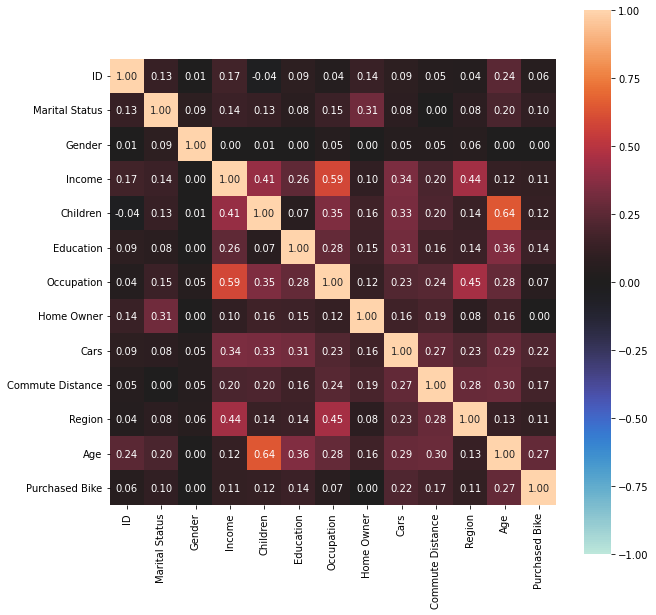

In [19]:
complete_correlation = associations(data, filename= 'complete_correlation.png', figsize=(10,10))
# df_complete_corr=complete_correlation['corr']
# df_complete_corr.dropna(axis=1, how='all').dropna(axis=0, how='all').style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

In [20]:
df2 = data[['Commute Distance', 'Purchased Bike']]
pd.crosstab(data['Purchased Bike'], data['Commute Distance'])




Commute Distance,0-1 Miles,1-2 Miles,10+ Miles,2-5 Miles,5-10 Miles
Purchased Bike,,,,,
No,165,92,77,67,116
Yes,199,77,33,94,75


<AxesSubplot:xlabel='Commute Distance', ylabel='Count'>

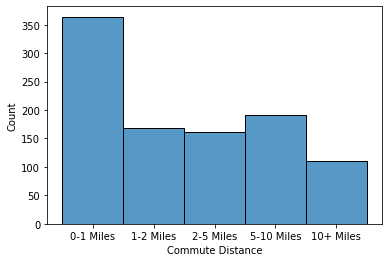

In [24]:
sns.histplot(data['Commute Distance'])

<AxesSubplot:xlabel='Age', ylabel='Count'>

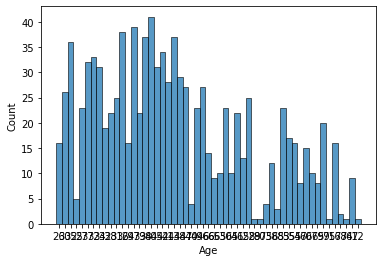

In [25]:
age_results = pd.crosstab(data['Purchased Bike'], data['Age'])
sns.histplot(data['Age'])

<AxesSubplot:xlabel='Purchased Bike', ylabel='Count'>

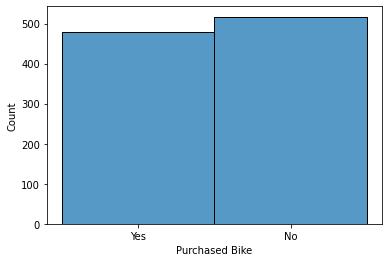

In [20]:
sns.histplot(data['Purchased Bike'])

In [26]:

X = data.loc[:, data.columns != 'Purchased Bike']
# Y = data['Purchased Bike']
Y = data['Purchased Bike']
# Y = data['Purchased Bike'].apply(lambda x: 1 if x=='Yes' else 0)
Y

0      Yes
1       No
2       No
3      Yes
4      Yes
      ... 
995    Yes
996    Yes
997     No
998     No
999     No
Name: Purchased Bike, Length: 995, dtype: object

## Creating Model Ready Dataframes

In [27]:
df3 = data.__deepcopy__()
df3 = df3.drop(columns=['ID'])

In [30]:
marital_status = pd.get_dummies(data['Marital Status'], drop_first=True)
gender = pd.get_dummies(data['Gender'], drop_first=True)
education = pd.get_dummies(data['Education'], drop_first=True)
occupation = pd.get_dummies(data['Occupation'], drop_first=True)
home_owner = pd.get_dummies(data['Home Owner'], drop_first=True)
commute_dist = pd.get_dummies(data['Commute Distance'], drop_first=True)
region = pd.get_dummies(data['Region'], drop_first=True)
purchased_bike = pd.get_dummies(data['Purchased Bike'], drop_first=True)
purchased_bike.rename(columns={'Yes': 'purchased_bike'}, inplace=True)
df3.drop(['Marital Status', 'Gender', 'Education', 'Occupation', 'Home Owner', 'Commute Distance', 'Region', 'Purchased Bike'], axis=1, inplace=True)
df3 = pd.concat([df3, marital_status, gender, education, occupation, home_owner, commute_dist, region, purchased_bike], axis=1)


In [31]:
df3

,Income,Children,Cars,Age,Single,Male,Graduate Degree,High School,Partial College,Partial High School,...,Professional,Skilled Manual,Yes,1-2 Miles,10+ Miles,2-5 Miles,5-10 Miles,North America,Pacific,purchased_bike
0,10000,0,1,26,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1
1,10000,0,2,30,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,10000,0,2,35,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,10000,0,1,26,1,1,0,0,1,0,...,0,0,1,1,0,0,0,0,1,1
4,10000,0,0,30,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,100000,5,1,47,1,1,0,0,0,0,...,1,0,1,0,0,0,1,0,1,1
996,110000,5,4,48,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,1,1
997,110000,5,4,46,0,1,0,0,1,0,...,1,0,1,0,0,1,0,1,0,0
998,130000,5,4,59,0,0,0,0,1,0,...,1,0,1,0,0,0,0,0,0,0


In [32]:

X = df3.loc[:, df3.columns != 'purchased_bike']
# Y = data['Purchased Bike']
Y = df3['purchased_bike']
# Y = data['Purchased Bike'].apply(lambda x: 1 if x=='Yes' else 0)

### Splitting data for testing and training

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y , test_size=0.25, random_state=0)


### Assesing different models

In [35]:
models = {}

# Logistic Regression
from sklearn.linear_model import LogisticRegression
models['Logistic Regression'] = LogisticRegression()

# Support Vector Machines
from sklearn.svm import LinearSVC
models['Support Vector Machines'] = LinearSVC()

# Decision Trees
from sklearn.tree import DecisionTreeClassifier
models['Decision Trees'] = DecisionTreeClassifier()

# Random Forest
from sklearn.ensemble import RandomForestClassifier
models['Random Forest'] = RandomForestClassifier()

# Naive Bayes
from sklearn.naive_bayes import GaussianNB
models['Naive Bayes'] = GaussianNB()

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
models['K-Nearest Neighbor'] = KNeighborsClassifier()


from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy, precision, recall = {}, {}, {}

for key in models.keys():
    
    # Fit the classifier
    models[key].fit(X_train, y_train)
    
    # Make predictions
    predictions = models[key].predict(X_test)
    
    # Calculate metrics
    accuracy[key] = accuracy_score(predictions, y_test)
    precision[key] = precision_score(predictions, y_test)
    # recall[key] = recall_score(predictions, y_test)


/home/ngoni/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [38]:
df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
# df_model['Recall'] = recall.values()

df_model


,Accuracy,Precision
Logistic Regression,0.574297,0.316667
Support Vector Machines,0.481928,1.000000
Decision Trees,0.674699,0.666667
Random Forest,0.714859,0.675000
Naive Bayes,0.602410,0.583333
K-Nearest Neighbor,0.678715,0.625000


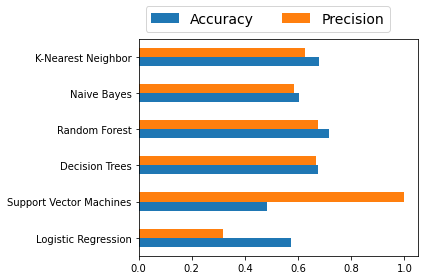

In [39]:
ax = df_model.plot.barh()
ax.legend(
    ncol=len(models.keys()), 
    bbox_to_anchor=(0, 1), 
    loc='lower left', 
    prop={'size': 14}
)
plt.tight_layout()


In [45]:
feature_importance = models['Random Forest'].feature_importances_
len(feature_importance)

21

In [ ]:
len(df3.columns)
df3.columns[:-1]

<BarContainer object of 21 artists>

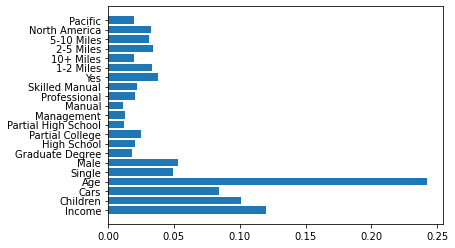

In [46]:
plt.barh(list(df3.columns[:-1]), feature_importance)


In [54]:
tab = pd.crosstab(data['Purchased Bike'], data['Age'])



In [33]:
pd.crosstab(data['Purchased Bike'], data['Income'])

Income,10000,100000,110000,120000,130000,150000,160000,170000,20000,250000,30000,40000,50000,60000,70000,80000,90000
Purchased Bike,,,,,,,,,,,,,,,,,
No,44,18,8,8,17,1,0,1,43,1,81,64,20,84,58,55,14
Yes,29,11,8,9,14,3,3,1,34,0,51,89,20,82,65,35,24


In [56]:
 pd.crosstab(data['Purchased Bike'], data['Cars'])

Cars,0,1,2,3,4
Purchased Bike,,,,,
No,93,115,219,51,39
Yes,148,151,125,33,21


In [35]:
pd.crosstab(data['Purchased Bike'], data['Children'])

Children,0,1,2,3,4,5,12
Purchased Bike,,,,,,,
No,135,72,112,62,73,62,1
Yes,138,97,98,73,54,18,0


In [36]:
pd.crosstab(data['Purchased Bike'], data['Region'])

Region,Europe,North America,Pacific
Purchased Bike,,,
No,151,288,78
Yes,147,219,112


In [37]:
# from sklearn.preprocessing import StandardScaler

# ss_train = StandardScaler()
# X_train = ss_train.fit_transform(X_train)

# ss_test = StandardScaler()
# X_test = ss_test.fit_transform(X_test)
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

LogisticRegression()